<a href="https://colab.research.google.com/github/adamd1985/Lectures_On_MLAI/blob/main/4_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Regression and Ordinary Least Squares (OLS)

It is assumed you have understood the introduction to Machine Learning notebook [here](https://colab.research.google.com/drive/1UsuLOvdM1SxkumRh2bzCverG8qt3VJMh?usp=sharing) and Data Engineering [here](https://colab.research.google.com/drive/1Icd8nKeEq8bgmFhSgllZxoreS4d9Gopc?usp=sharing).

## Introduction

Linear regression is a foundational model in supervised learning that approximates the relationship between one or more predictors and a continuous target variable. It minimizes the **sum of squared errors (SSE)**, which is the core of **Ordinary Least Squares (OLS)**.
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Univariate OLS

We will apply the same concepts learned in the lesson to this notebook.
We will first do all manually, without using any APIs.

Then compare with scikit learn APIs.

### Formula
The simple linear regression model can be written as:
$$
Y = \beta_0 + \beta_1 X + ϵ
$$
Here:
- $ Y $ is the dependent variable (target).
- $ X $ is the independent variable (feature).
- $ \beta_0 $ is the intercept.
- $ \beta_1 $ is the slope of the line.

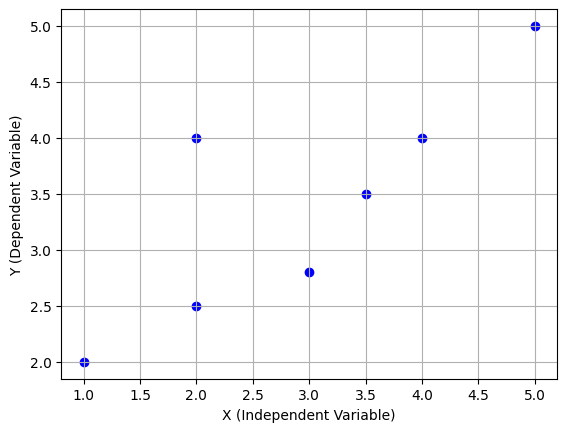

In [2]:
X = np.array([1, 2, 2, 3, 3.5, 4, 5])
Y = np.array([2, 2.5, 4, 2.8, 3.5, 4, 5])

plt.scatter(X, Y, color='blue')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.grid(True)
plt.show()

Calculate  $ \beta_0 $ (intercept) and $ \beta_1 $ (slope)


$
\text{Mean of } X: \quad \bar{X} = \frac{1}{n} \sum_{i=1}^n x_i, \quad
\text{Mean of } Y: \quad \bar{Y} = \frac{1}{n} \sum_{i=1}^n y_i
$

$
\text{Covariance of } X \text{ and } Y: \quad \text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{X})(y_i - \bar{Y})
$

$
\text{Variance of } X: \quad \text{Var}(X) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{X})^2
$

$
\text{Slope:} \quad \beta_1 = \frac{\text{Cov}(X, Y)}{\text{Var}(X)}
$

$
\text{Intercept:} \quad \beta_0 = \bar{Y} - \beta_1 \bar{X}
$

Here:
- $ n $: Number of observations.
- $ x_i, y_i $: Data points.
- $ \bar{X}, \bar{Y} $: Means of $ X $ and $ Y $.
- $ \beta_1 $: Slope of the regression line.
- $ \beta_0 $: Intercept of the regression line.


In [3]:
n = len(X)
mean_X = np.mean(X)
mean_Y = np.mean(Y)
cov_XY = np.sum((X - mean_X) * (Y - mean_Y)) / n
var_X = np.sum((X - mean_X)**2) / n

# Coefficients
beta_1 = cov_XY / var_X
beta_0 = mean_Y - beta_1 * mean_X

print(f"Beta_0 (Intercept): {beta_0}")
print(f"Beta_1 (Slope): {beta_1}")

Beta_0 (Intercept): 1.5850318471337577
Beta_1 (Slope): 0.6197452229299364


Add a scikit learn regression to validate it. Read about its APIs to score and evaluate models [here](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [4]:
from sklearn.linear_model import LinearRegression

X_reshaped = X.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped, Y)

print(f"Scikit-learn OLS - Intercept: {model.intercept_}")
print(f"Scikit-learn OLS - Slope: {model.coef_[0]}")

Scikit-learn OLS - Intercept: 1.5850318471337583
Scikit-learn OLS - Slope: 0.6197452229299362


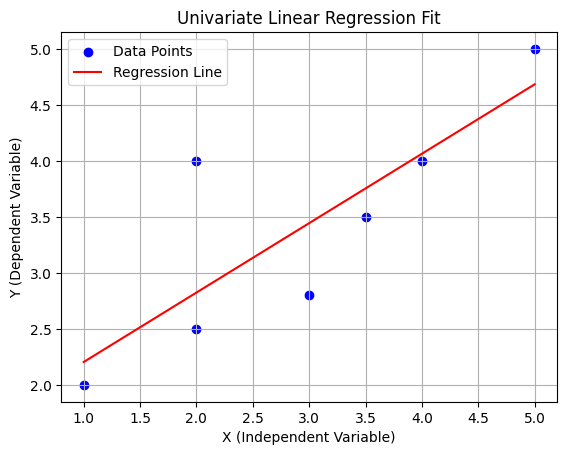

In [5]:
Y_pred = beta_0 + beta_1 * X
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Univariate Linear Regression Fit')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.legend()
plt.grid(True)
plt.show()

## 1. Calculate R-Squared ($R^2$)

The $R^2$ value, also called the Coefficient of Determination, measures the proportion of variance in $Y$ explained by the regression model. It is calculated using the formula:

$$
R^2 = 1 - \frac{\text{SSE}_{\text{residual}}}{\text{SSE}_{\text{total}}}
$$

- $\text{SSE}_{\text{residual}} = \sum (Y - \hat{Y})^2$: The sum of squared residuals (errors).
- $\text{SSE}_{\text{total}} = \sum (Y - \bar{Y})^2$: The total variance in $Y$.

In [6]:
mean_Y = np.mean(Y)
SS_residual = np.sum((Y - Y_pred)**2)
SS_total = np.sum((Y - mean_Y)**2)
R2 = 1 - (SS_residual / SS_total)
print(f"R^2 (Coefficient of Determination): {R2:.4f}")

R^2 (Coefficient of Determination): 0.6709


In [7]:
from sklearn.metrics import r2_score

R2_sklearn = r2_score(Y, Y_pred)
print(f"Scikit-learn R^2: {R2_sklearn:.4f}")

Scikit-learn R^2: 0.6709


## 2. Calculate Mean Squared Error (MSE)

The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values. It is calculated using the formula:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2
$$

- $Y_i$: Actual observed values.
- $\hat{Y}_i$: Predicted values.
- $n$: Number of observations.


In [8]:
n = len(Y)
mse = SS_residual / n
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.3018


In [9]:
from sklearn.metrics import mean_squared_error

mse_sklearn = mean_squared_error(Y, Y_pred)
print(f"Scikit-learn MSE: {mse_sklearn:.4f}")

Scikit-learn MSE: 0.3018


## 3. Calculate Root Mean Squared Error (RMSE)

The Root Mean Squared Error (RMSE) measures the square root of the average squared differences between actual and predicted values, providing error in the same units as the dependent variable. It is calculated using the formula:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

- $\text{MSE}$: Mean Squared Error, calculated in the previous step.


In [10]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.5494


In [11]:
from sklearn.metrics import root_mean_squared_error

rmse_sklearn = root_mean_squared_error(Y, Y_pred)
print(f"Scikit-learn RMSE: {rmse_sklearn:.4f}")

Scikit-learn RMSE: 0.5494


## Calculate F-Statistic

The F-Statistic for regression evaluates the overall significance of the regression model. It compares the variation explained by the model (Model Sum of Squares, $\text{SS}_{\text{model}}$) to the unexplained variation (Residual Sum of Squares, $\text{SS}_{\text{residual}}$). It is calculated using the formula:

$$
F = \frac{\text{MS}_{\text{model}}}{\text{MS}_{\text{residual}}}
$$

Where:
- $\text{MS}_{\text{model}} = \frac{\text{SS}_{\text{model}}}{p}$: Mean Square for the model, with $p$ as the number of predictors.
- $\text{MS}_{\text{residual}} = \frac{\text{SS}_{\text{residual}}}{n - p - 1}$: Mean Square for the residuals, with $n$ as the number of observations.

The Sum of Squares values are:
- $\text{SS}_{\text{model}} = \sum (\hat{Y} - \bar{Y})^2$: Measures variation explained by the model.
- $\text{SS}_{\text{residual}} = \sum (Y - \hat{Y})^2$: Measures unexplained variation (residuals).


In [12]:
from scipy.stats import f

mean_Y = np.mean(Y)

SS_model = np.sum((Y_pred - mean_Y)**2)
SS_residual = np.sum((Y - Y_pred)**2)
n = len(Y)
p = 1 if len(X.shape) == 1 else X.shape[1]

MS_model = SS_model / p
MS_residual = SS_residual / (n - p - 1)
F_statistic = MS_model / MS_residual

p_value = 1 - f.cdf(F_statistic, n, (n - p - 1))

print(f"F-Statistic: {F_statistic:.4f} at {p_value}")

F-Statistic: 10.1933 at 0.010581524951127963


In [13]:
from sklearn.feature_selection import f_regression

F_statistic_sklearn, p = f_regression(X_reshaped, Y)
print(f"Scikit-learn F-Statistic: {F_statistic_sklearn[0]:.4f} at {p}")

Scikit-learn F-Statistic: 10.1933 at [0.02419186]


## Multivariate OLS

### Formula

In the multivariate case, the linear regression model can be written as:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p
$$
or equivalently, in matrix form:
$$
Y = X \beta + \epsilon
$$
Here:
- $Y$ is the vector of observed dependent variable values.
- $X$ is the design matrix containing the independent variables (features), including a column of ones for the intercept.
- $\beta$ is the vector of coefficients, including the intercept ($\beta_0$) and slopes ($\beta_1, \beta_2, \dots, \beta_p$).
- $\epsilon$ is the vector of residuals, representing the unexplained variation.

### Ordinary Least Squares (OLS)

The goal of OLS is to find the coefficients $\beta$ that minimize the sum of squared residuals:
$$
S(\beta) = \sum_{i=1}^n \epsilon_i^2 = \| Y - X \beta \|^2
$$

The solution for $\beta$ is given by:
$$
\beta = (X^\top X)^{-1} X^\top Y
$$

For this, we generate a random 3dimension array, 2 feature vectors and 1 label vector.

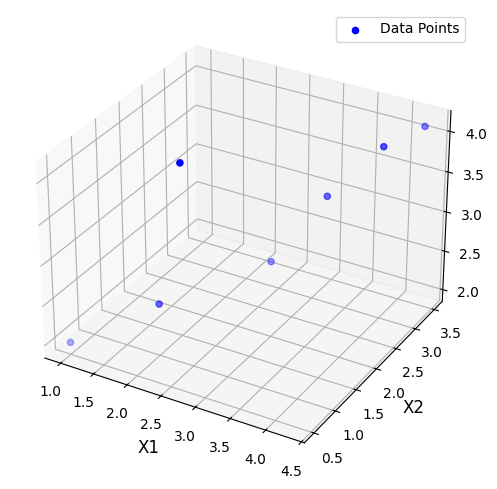

In [14]:
from mpl_toolkits.mplot3d import Axes3D

X1 = np.array([1, 2, 2, 3, 3.5, 4, 4.3])
X2 = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5])
Y = np.array([2, 2.5, 4, 2.8, 3.5, 4, 4.1])


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X1, X2, Y, color='blue', label='Data Points')
ax.set_xlabel('X1', fontsize=12)
ax.set_ylabel('X2', fontsize=12)
ax.set_zlabel('Y', fontsize=12)
ax.legend()
plt.show()

The design matrix $X$ for multivariate regression includes a column of ones for the intercept and the feature values:

$$
X = \begin{bmatrix}
1 & x_{11} & x_{12} \\
1 & x_{21} & x_{22} \\
\vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2}
\end{bmatrix}
$$

In [15]:
X = np.column_stack((np.ones(len(X1)), X1, X2))
X

array([[1. , 1. , 0.5],
       [1. , 2. , 1. ],
       [1. , 2. , 1.5],
       [1. , 3. , 2. ],
       [1. , 3.5, 2.5],
       [1. , 4. , 3. ],
       [1. , 4.3, 3.5]])

The product $X^\top X$ is computed as:

$$
X^\top X = \begin{bmatrix}
1 & \sum x_{1i} & \sum x_{2i} \\
\sum x_{1i} & \sum x_{1i}^2 & \sum x_{1i} x_{2i} \\
\sum x_{2i} & \sum x_{1i} x_{2i} & \sum x_{2i}^2
\end{bmatrix}
$$

Where:
- $\sum x_{1i}$ and $\sum x_{2i}$ are the sums of the individual features.
- $\sum x_{1i}^2$ and $\sum x_{2i}^2$ are the sums of the squared feature values.
- $\sum x_{1i} x_{2i}$ is the sum of the products of the two features.


In [16]:
X_transpose = X.T
XtX = X_transpose @ X
XtX

array([[ 7.  , 19.8 , 14.  ],
       [19.8 , 64.74, 47.3 ],
       [14.  , 47.3 , 35.  ]])

The inverse of $X^\top X$, denoted as $(X^\top X)^{-1}$, is computed as:

$$
(X^\top X)^{-1} = (X^\top X) \cdot (X^\top X)^{-1} = I
$$

Where $I$ is the identity matrix:

$$
I = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$


In [17]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv

array([[ 2.20926641, -2.37837838,  2.33050193],
       [-2.37837838,  3.78378378, -4.16216216],
       [ 2.33050193, -4.16216216,  4.72123552]])

The product $X^\top Y$ is computed as:

$$
X^\top Y = \begin{bmatrix}
\sum y_i \\
\sum x_{1i} y_i \\
\sum x_{2i} y_i
\end{bmatrix}
$$

Where:
- $\sum y_i$ is the sum of all observed values in $Y$.
- $\sum x_{1i} y_i$ is the sum of the product of the first feature $x_{1i}$ and the target $y_i$.
- $\sum x_{2i} y_i$ is the sum of the product of the second feature $x_{2i}$ and the target $y_i$.


In [18]:
XtY = X_transpose @ Y
XtY

array([22.9 , 69.28, 50.2 ])

The regression coefficients $\beta$ are computed as:

$$
\beta = (X^\top X)^{-1} X^\top Y
$$

Where:
- $(X^\top X)^{-1}$ is the inverse of $X^\top X$.
- $X^\top Y$ is the product of the transpose of $X$ and the target vector $Y$.

The result $\beta$ is a vector:

$$
\beta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{bmatrix}
$$

Here:
- $\beta_0$ is the intercept.
- $\beta_1$ is the coefficient for the first feature $x_1$.
- $\beta_2$ is the coefficient for the second feature $x_2$.


In [19]:
betas = XtX_inv @ XtY
beta_0 = betas[0]  # Intercept
beta_1 = betas[1]  # Coefficient for X1
beta_2 = betas[2]  # Coefficient for X2

print(f"Beta_0 (Intercept): {beta_0}")
print(f"Beta_1 (Coefficient for X1): {beta_1}")
print(f"Beta_2 (Coefficient for X2): {beta_2}")

Beta_0 (Intercept): 2.809343629343635
Beta_1 (Coefficient for X1): -1.264864864864925
Beta_2 (Coefficient for X2): 2.0199227799227737


In [20]:
model = LinearRegression()
model.fit(X, Y)

beta_0 = model.intercept_
betas = model.coef_
print(f"Beta_0 (Intercept): {beta_0}")
print(f"Beta_1 (Coefficient for X1): {betas[1]}")
print(f"Beta_2 (Coefficient for X2): {betas[2]}")

Beta_0 (Intercept): 2.809343629343628
Beta_1 (Coefficient for X1): -1.2648648648648624
Beta_2 (Coefficient for X2): 2.0199227799227772


In [21]:
import plotly.graph_objects as go

X1_mesh, X2_mesh = np.meshgrid(np.linspace(min(X1), max(X1), 20),
                               np.linspace(min(X2), max(X2), 20))
Y_pred_mesh = betas[0] + betas[1] * X1_mesh + betas[2] * X2_mesh

fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=X1,
    y=X2,
    z=Y,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
))
fig.add_trace(go.Surface(
    x=X1_mesh,
    y=X2_mesh,
    z=Y_pred_mesh,
    opacity=0.5,
    name='Fit Plane'
))
fig.update_layout(
    title='Multivariate Linear Regression Fit',
    scene_aspectmode='cube',
    scene=dict(
        xaxis_title='X1 (Feature 1)',
        yaxis_title='X2 (Feature 2)',
        zaxis_title='Y (Target)'
    ),
    width=800,
    height=800,
    showlegend=True
)

fig.show()

In [22]:
R2 = r2_score(Y, Y_pred)
print(f"R^2: {R2:.4f}")
MSE = mean_squared_error(Y, Y_pred)
print(f"MSE: {MSE:.4f}")
RMSE = np.sqrt(MSE)
print(f"RMSE: {RMSE:.4f}")
F_statistic_sklearn, p = f_regression(X_reshaped, Y)
print(f"F-Statistic: {F_statistic_sklearn[0]:.4f} at {p}")

R^2: 0.4442
MSE: 0.3362
RMSE: 0.5798
F-Statistic: 5.9816 at [0.05824128]


# Regularization

A note on Scikit-learn's APIs: these use the term $ \alpha $.

$ \alpha $ is equivalent to $ \lambda $ or an approximation of it:

$$
\alpha = \lambda \cdot n \quad \text{or equivalently} \quad \lambda = \frac{\alpha}{n}
$$

Where $ n $ is the number of samples. For example, $ \lambda = 0.1 $ corresponds to $ \alpha = 10 $ when $ n = 100 $.


## L1 Regularization (Lasso)

The objective of L1 regularization (Lasso) is to minimize the following loss function:

$$
J(\beta) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\beta_j|
$$

Where:
- $ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $: Mean Squared Error (MSE).
- $ \lambda \sum_{j=1}^p |\beta_j| $: L1 regularization term.
- $ \lambda $: Regularization strength.

Intercept (Beta_0): 0.3270815324747127
Coefficients (Beta_1, Beta_2, ...): [ 2.2971534  -0.71314815  0.08049584]
R-Squared (R^2): 0.6503
Mean Squared Error (MSE): 0.6865
Root Mean Squared Error (RMSE): 0.8286


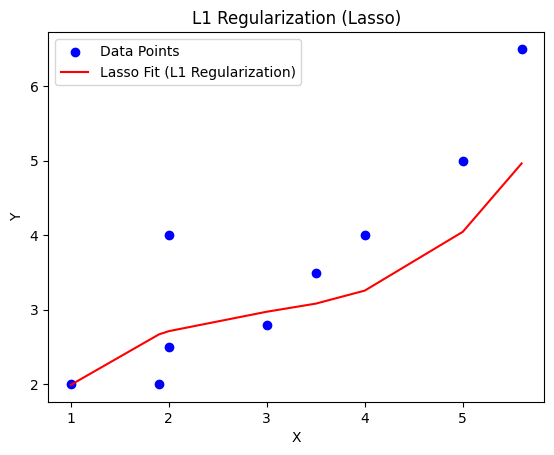

In [23]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 1.9, 2, 2, 3, 3.5, 4, 5, 5.6]).reshape(-1, 1)
Y = np.array([2, 2, 2.5, 4, 2.8, 3.5, 4, 5, 6.5])

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

lambda_l1 = 0.01

XtX = X_poly.T @ X_poly
XtY = X_poly.T @ Y
betas = np.linalg.inv(XtX) @ XtY

l1_penalty = lambda_l1 * np.sign(betas)
betas -= l1_penalty

Y_pred = X_poly @ betas

R2 = r2_score(Y, Y_pred)
MSE = mean_squared_error(Y, Y_pred)
RMSE = np.sqrt(MSE)
F_statistic, p = f_regression(X_poly, Y)

print(f"Intercept (Beta_0): {betas[0]}")
print(f"Coefficients (Beta_1, Beta_2, ...): {betas[1:]}")
print(f"R-Squared (R^2): {R2:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Lasso Fit (L1 Regularization)')
plt.title('L1 Regularization (Lasso)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


validate with scikit Lasso [API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

In [24]:
from sklearn.linear_model import Lasso

a = lambda_l1*X_poly.shape[0]
print(f"Shapes: {X_poly.shape}, alpha: {a}")

lasso = Lasso(alpha=a)
lasso.fit(X_poly, Y)

betas = np.append(lasso.intercept_, lasso.coef_)
Y_pred = lasso.predict(X_poly)

R2 = r2_score(Y, Y_pred)
MSE = mean_squared_error(Y, Y_pred)
RMSE = np.sqrt(MSE)
F_statistic, p = f_regression(X_poly, Y)

print(f"Intercept (Beta_0): {lasso.intercept_:.4f}")
print(f"Coefficients (Beta_1, Beta_2): {lasso.coef_}")
print(f"R-Squared (R^2): {R2:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
print(f"F-Statistic: {F_statistic[1]:.4f} at p-value: {p[1]:.4e}")

Shapes: (9, 4), alpha: 0.09
Intercept (Beta_0): 2.4499
Coefficients (Beta_1, Beta_2): [0.         0.         0.         0.02236483]
R-Squared (R^2): 0.8503
Mean Squared Error (MSE): 0.2940
Root Mean Squared Error (RMSE): 0.5422
F-Statistic: 26.7889 at p-value: 1.2868e-03


## L2 Regularization (Ridge)

The objective of L2 regularization (Ridge) is to minimize the following loss function:

$
J(\beta) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2
$

Where:
- $ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $: Mean Squared Error (MSE).
- $ \lambda \sum_{j=1}^p \beta_j^2 $: L2 regularization term.
- $ \lambda $: Regularization strength.

The gradient of the loss function with respect to $ \beta $ is:

$
\frac{\partial J}{\partial \beta_j} = \frac{-2}{n} \sum_{i=1}^n X_{ij} \cdot (y_i - \hat{y}_i) + 2\lambda \beta_j
$

Intercept (Beta_0): 0.5856611146596151
Coefficients (Beta_1, Beta_2, ...): [ 2.01494834 -0.62590313  0.08091648]
R-Squared (R^2): 0.8688
Mean Squared Error (MSE): 0.2575
Root Mean Squared Error (RMSE): 0.5075


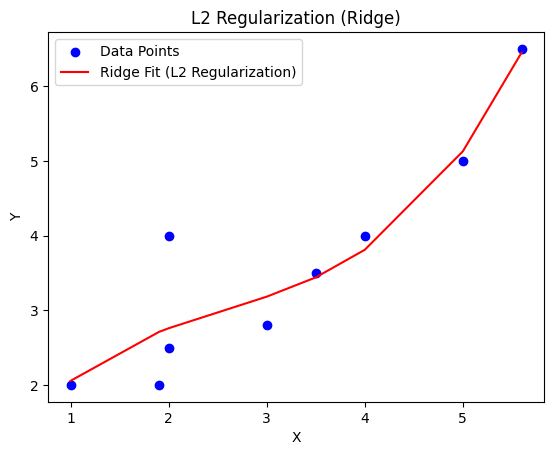

In [25]:
lambda_l2 = 0.01

XtX = X_poly.T @ X_poly
XtX_with_penalty = XtX + lambda_l2 * np.eye(X_poly.shape[1])
XtY = X_poly.T @ Y
betas = np.linalg.inv(XtX_with_penalty) @ XtY

Y_pred = X_poly @ betas

R2 = r2_score(Y, Y_pred)
MSE = mean_squared_error(Y, Y_pred)
RMSE = np.sqrt(MSE)

print(f"Intercept (Beta_0): {betas[0]}")
print(f"Coefficients (Beta_1, Beta_2, ...): {betas[1:]}")
print(f"R-Squared (R^2): {R2:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Ridge Fit (L2 Regularization)')
plt.title('L2 Regularization (Ridge)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Validate with Scikit Ridge [API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).

In [26]:
from sklearn.linear_model import Ridge

a = lambda_l1*X_poly.shape[0]
print(f"Shapes: {X_poly.shape}, alpha: {a}")

ridge = Ridge(alpha=a)
ridge.fit(X_poly, Y)

betas = np.append(ridge.intercept_, ridge.coef_)
Y_pred = ridge.predict(X_poly)

R2 = r2_score(Y, Y_pred)
MSE = mean_squared_error(Y, Y_pred)
RMSE = np.sqrt(MSE)
F_statistic, p = f_regression(X_poly, Y)

print(f"Intercept (Beta_0): {ridge.intercept_:.4f}")
print(f"Coefficients (Beta_1, Beta_2): {ridge.coef_}")
print(f"R-Squared (R^2): {R2:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
print(f"F-Statistic: {F_statistic[1]:.4f} at p-value: {p[1]:.4e}")

Shapes: (9, 4), alpha: 0.09
Intercept (Beta_0): 1.5906
Coefficients (Beta_1, Beta_2): [ 0.          0.86037606 -0.24712259  0.04394673]
R-Squared (R^2): 0.8622
Mean Squared Error (MSE): 0.2706
Root Mean Squared Error (RMSE): 0.5202
F-Statistic: 26.7889 at p-value: 1.2868e-03


## L1+L2 Elastic Net Regularization

The objective of Elastic Net regularization is to minimize the following loss function:

$$
J(\beta) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \left[ \alpha \sum_{j=1}^p |\beta_j| + (1 - \alpha) \sum_{j=1}^p \beta_j^2 \right]
$$

Where:
- $ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $: Mean Squared Error (MSE).
- $ \alpha \sum_{j=1}^p |\beta_j| $: L1 regularization term, controlled by $ \alpha $.
- $ (1 - \alpha) \sum_{j=1}^p \beta_j^2 $: L2 regularization term, controlled by $ 1 - \alpha $.
- $ \lambda $: Overall regularization strength.
- $ \alpha $: Elastic Net mixing parameter, where $ \alpha = 1 $ corresponds to Lasso and $ \alpha = 0 $ corresponds to Ridge.


Intercept (Beta_0): 0.473985478269351
Coefficients (Beta_1, Beta_2, ...): [ 2.13619357 -0.66308913  0.08008289]
R-Squared (R^2): 0.8143
Mean Squared Error (MSE): 0.3645
Root Mean Squared Error (RMSE): 0.6038


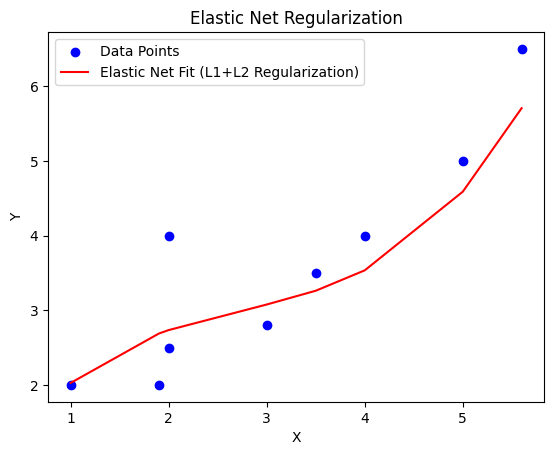

In [27]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

lambda_ = 0.01
alpha = 0.5     # Elastic Net mixing parameter (0 = Ridge, 1 = Lasso)

XtX = X_poly.T @ X_poly
XtY = X_poly.T @ Y

XtX_with_penalty = XtX + (1 - alpha) * lambda_ * np.eye(X_poly.shape[1])
betas = np.linalg.inv(XtX_with_penalty) @ XtY
l1_penalty = alpha * lambda_ * np.sign(betas)
betas -= l1_penalty

Y_pred = X_poly @ betas

R2 = r2_score(Y, Y_pred)
MSE = mean_squared_error(Y, Y_pred)
RMSE = np.sqrt(MSE)

print(f"Intercept (Beta_0): {betas[0]}")
print(f"Coefficients (Beta_1, Beta_2, ...): {betas[1:]}")
print(f"R-Squared (R^2): {R2:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Elastic Net Fit (L1+L2 Regularization)')
plt.title('Elastic Net Regularization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Validate with ElasticNet [API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet).

In [28]:
from sklearn.linear_model import ElasticNet

a = lambda_l1*X_poly.shape[0]
print(f"Shapes: {X_poly.shape}, alpha: {a}")

elastic_net = ElasticNet(alpha=a, l1_ratio=0.5)
elastic_net.fit(X_poly, Y)

betas = np.append(elastic_net.intercept_, elastic_net.coef_)
Y_pred = elastic_net.predict(X_poly)

R2 = r2_score(Y, Y_pred)
MSE = mean_squared_error(Y, Y_pred)
RMSE = np.sqrt(MSE)
F_statistic, p = f_regression(X_poly, Y)

print(f"Intercept (Beta_0): {elastic_net.intercept_:.4f}")
print(f"Coefficients (Beta_1, Beta_2): {elastic_net.coef_}")
print(f"R-Squared (R^2): {R2:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
print(f"F-Statistic: {F_statistic[1]:.4f} at p-value: {p[1]:.4e}")


Shapes: (9, 4), alpha: 0.09
Intercept (Beta_0): 2.4013
Coefficients (Beta_1, Beta_2): [0.         0.         0.01533237 0.01976589]
R-Squared (R^2): 0.8511
Mean Squared Error (MSE): 0.2923
Root Mean Squared Error (RMSE): 0.5407
F-Statistic: 26.7889 at p-value: 1.2868e-03


# Fitting Problems

We create higher degree features and interaction terms using the api [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

## High Bias (Underfitting)

The model cannot capture the nonlinear structure of the data.

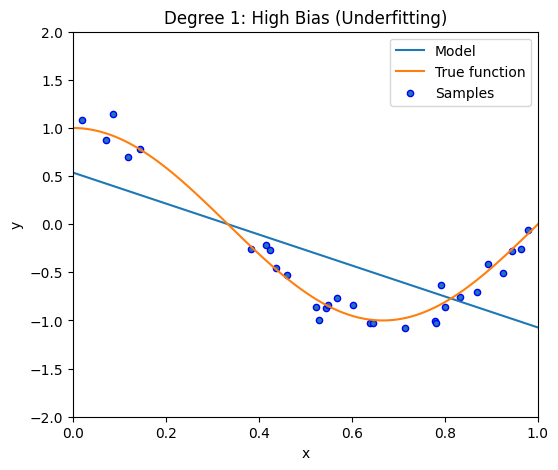

Intercept (Beta_0): 0.5367
Coefficients (Beta_1, ...): [-1.60931179]
R-Squared (R^2): 0.4737
Mean Squared Error (MSE): 0.2259
Root Mean Squared Error (RMSE): 0.4753
F-Statistic (first term): 25.1995 at p-value: 2.6264e-05


In [29]:
from sklearn.pipeline import Pipeline

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

degree = 1
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X[:, np.newaxis], y)
X_test = np.linspace(0, 1, 100)
Y_pred = pipeline.predict(X_test[:, np.newaxis])

plt.figure(figsize=(6, 5))
plt.plot(X_test, Y_pred, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree 1: High Bias (Underfitting)")
plt.show()

Y_pred_train = pipeline.predict(X[:, np.newaxis])
R2 = r2_score(y, Y_pred_train)
MSE = mean_squared_error(y, Y_pred_train)
RMSE = np.sqrt(MSE)
X_poly = polynomial_features.transform(X[:, np.newaxis])
F_statistic, p_values = f_regression(X_poly, y)

print(f"Intercept (Beta_0): {linear_regression.intercept_:.4f}")
print(f"Coefficients (Beta_1, ...): {linear_regression.coef_}")
print(f"R-Squared (R^2): {R2:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
print(f"F-Statistic (first term): {F_statistic[0]:.4f} at p-value: {p_values[0]:.4e}")

## High Variance (Overfitting)

At degree 15+ the model becomes overly complex, capturing noise instead of the true pattern.

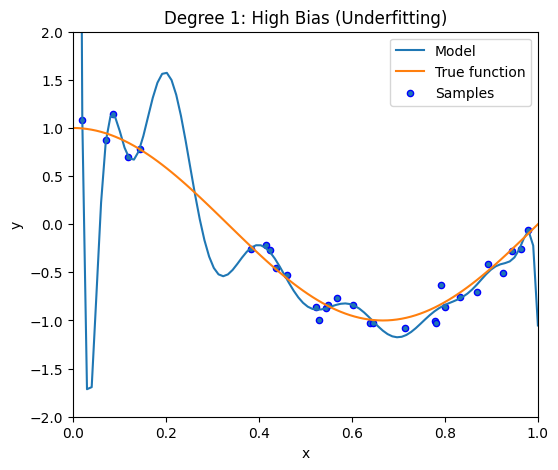

Intercept (Beta_0): 31.4495
Coefficients (Beta_1, ...): [-2.98293082e+03  1.03899393e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]
R-Squared (R^2): 0.9884
Mean Squared Error (MSE): 0.0050
Root Mean Squared Error (RMSE): 0.0706
F-Statistic (first term): 25.1995 at p-value: 2.6264e-05


In [30]:
degree = 15
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X[:, np.newaxis], y)
X_test = np.linspace(0, 1, 100)
Y_pred = pipeline.predict(X_test[:, np.newaxis])

plt.figure(figsize=(6, 5))
plt.plot(X_test, Y_pred, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree 1: High Bias (Underfitting)")
plt.show()

Y_pred_train = pipeline.predict(X[:, np.newaxis])
R2 = r2_score(y, Y_pred_train)
MSE = mean_squared_error(y, Y_pred_train)
RMSE = np.sqrt(MSE)
X_poly = polynomial_features.transform(X[:, np.newaxis])
F_statistic, p_values = f_regression(X_poly, y)

print(f"Intercept (Beta_0): {linear_regression.intercept_:.4f}")
print(f"Coefficients (Beta_1, ...): {linear_regression.coef_}")
print(f"R-Squared (R^2): {R2:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
print(f"F-Statistic (first term): {F_statistic[0]:.4f} at p-value: {p_values[0]:.4e}")

## Regularization with Ridge

Applying Ridge regression to the high-degree polynomial model to reduce overfitting and make the model generalize better.

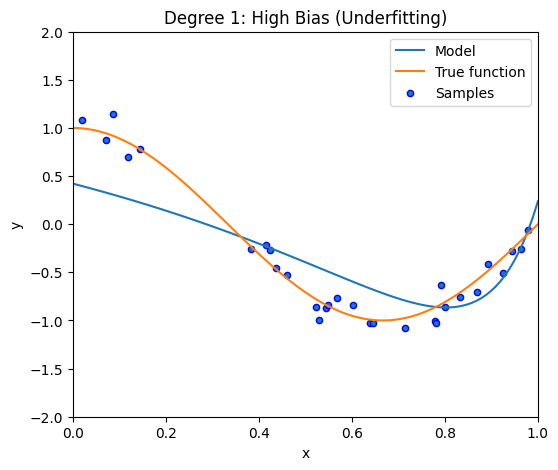

Intercept (Beta_0): 31.4495
Coefficients (Beta_1, ...): [-2.98293082e+03  1.03899393e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]
R-Squared (R^2): 0.7292
Mean Squared Error (MSE): 0.1162
Root Mean Squared Error (RMSE): 0.3409
F-Statistic (first term): 25.1995 at p-value: 2.6264e-05


In [31]:
degree = 15
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
ridge_regression = Ridge(alpha=1.0)
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("ridge_regression", ridge_regression),
    ]
)
pipeline.fit(X[:, np.newaxis], y)
X_test = np.linspace(0, 1, 100)
Y_pred = pipeline.predict(X_test[:, np.newaxis])

plt.figure(figsize=(6, 5))
plt.plot(X_test, Y_pred, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree 1: High Bias (Underfitting)")
plt.show()

Y_pred_train = pipeline.predict(X[:, np.newaxis])
R2 = r2_score(y, Y_pred_train)
MSE = mean_squared_error(y, Y_pred_train)
RMSE = np.sqrt(MSE)
X_poly = polynomial_features.transform(X[:, np.newaxis])
F_statistic, p_values = f_regression(X_poly, y)

print(f"Intercept (Beta_0): {linear_regression.intercept_:.4f}")
print(f"Coefficients (Beta_1, ...): {linear_regression.coef_}")
print(f"R-Squared (R^2): {R2:.4f}")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
print(f"F-Statistic (first term): {F_statistic[0]:.4f} at p-value: {p_values[0]:.4e}")

# High Correlation Problem

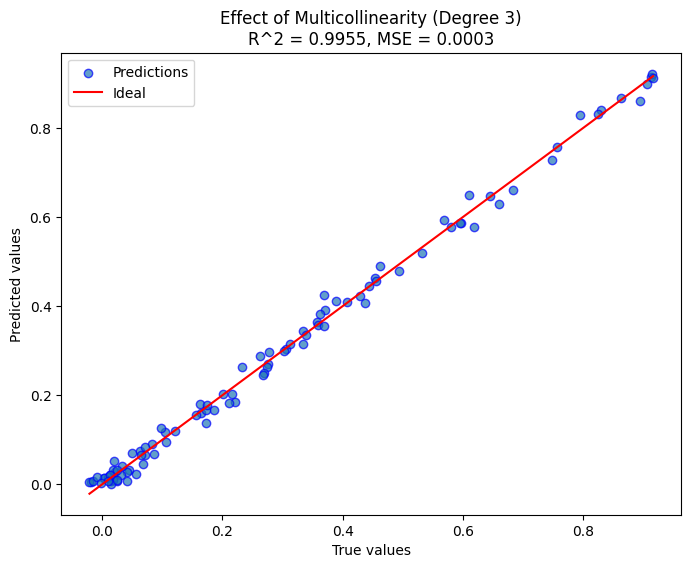

Coefficients:
Feature 1: -2.0174
Feature 2: 2.0148
Feature 3: 141.7325
Feature 4: -292.8250
Feature 5: 152.4540
Feature 6: 9356.8047
Feature 7: -29971.4782
Feature 8: 31989.7367
Feature 9: -11377.4297


In [32]:
from numpy.linalg import LinAlgError

np.random.seed(0)
n_samples = 100


X1 = np.random.rand(n_samples)
X2 = 0.95 * X1 + np.random.normal(0, 0.005, n_samples)  # Highly correlated with X1
y = X1 * X2 + np.random.normal(0, 0.02, n_samples)

X = np.vstack((X1, X2)).T
degree = 3
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)

try:
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)

    R2 = r2_score(y, y_pred)
    MSE = mean_squared_error(y, y_pred)

    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, edgecolor="b", alpha=0.7, label="Predictions")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", label="Ideal")
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.title(f"Effect of Multicollinearity (Degree {degree})\nR^2 = {R2:.4f}, MSE = {MSE:.4f}")
    plt.legend()
    plt.show()

    print("Coefficients:")
    for idx, coef in enumerate(pipeline.named_steps['linear_regression'].coef_):
        print(f"Feature {idx + 1}: {coef:.4f}")

except LinAlgError as e:
    print(f"Linear algebra error due to multicollinearity: {e}")

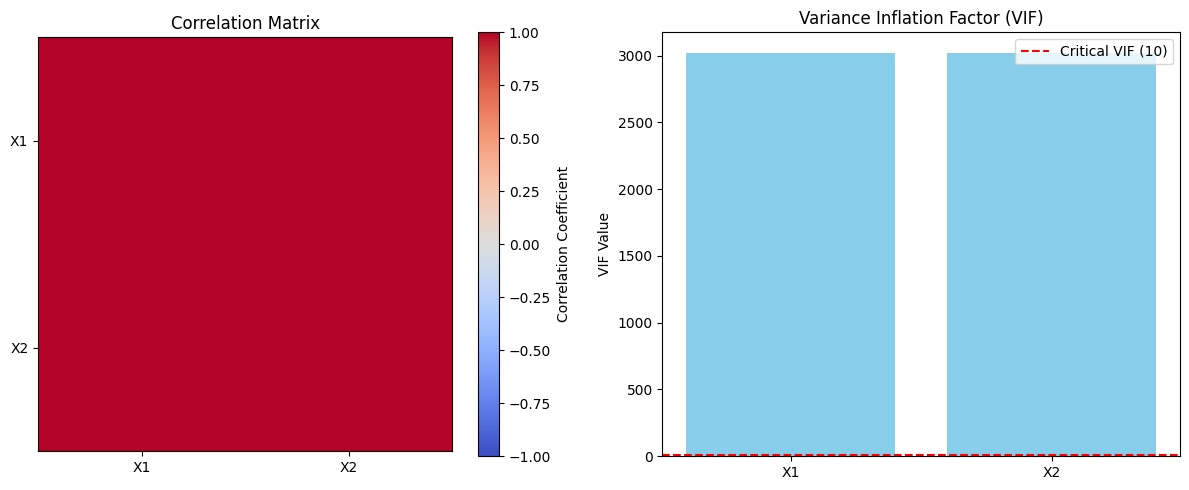

Correlation Matrix:
          X1        X2
X1  1.000000  0.999835
X2  0.999835  1.000000

Variance Inflation Factor (VIF):
  Feature          VIF
0      X1  3022.407499
1      X2  3022.407499


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
correlation_matrix = data[['X1', 'X2']].corr()
X = data[['X1', 'X2']]
X['Intercept'] = 1
vif_data = pd.DataFrame()
vif_data['Feature'] = ['X1', 'X2']
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns) - 1)]


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Correlation Matrix")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)  # Set vmin and vmax to -1 and 1
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.index)

plt.subplot(1, 2, 2)
plt.bar(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.title("Variance Inflation Factor (VIF)")
plt.ylabel("VIF Value")
plt.axhline(10, color='red', linestyle='--', label='Critical VIF (10)')
plt.legend()

plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

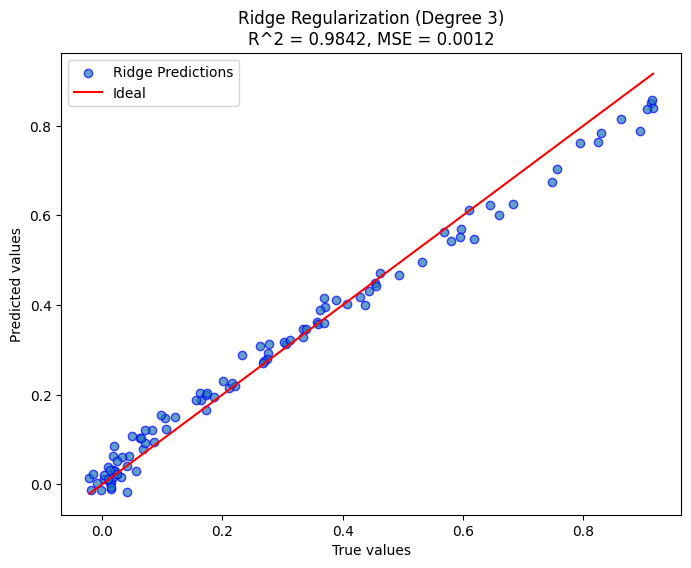

Ridge Coefficients:
Feature 1: 0.0523
Feature 2: 0.0497
Feature 3: 0.0000
Feature 4: 0.0669
Feature 5: 0.0635
Feature 6: 0.0523
Feature 7: 0.0604
Feature 8: 0.0497
Feature 9: 0.0000
Feature 10: 0.0682
Feature 11: 0.0648
Feature 12: 0.0669
Feature 13: 0.0616
Feature 14: 0.0635
Feature 15: 0.0523
Feature 16: 0.0585
Feature 17: 0.0604
Feature 18: 0.0497
Feature 19: 0.0000


In [34]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha=10)
pipeline_ridge = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("ridge_regression", ridge_regression),
    ]
)
pipeline_ridge.fit(X, y)
y_pred_ridge = pipeline_ridge.predict(X)

# Metrics
R2_ridge = r2_score(y, y_pred_ridge)
MSE_ridge = mean_squared_error(y, y_pred_ridge)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_ridge, edgecolor="b", alpha=0.7, label="Ridge Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", label="Ideal")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title(f"Ridge Regularization (Degree {degree})\nR^2 = {R2_ridge:.4f}, MSE = {MSE_ridge:.4f}")
plt.legend()
plt.show()

# Print Ridge coefficients
print("Ridge Coefficients:")
for idx, coef in enumerate(pipeline_ridge.named_steps['ridge_regression'].coef_):
    print(f"Feature {idx + 1}: {coef:.4f}")



# Conclusion

In this notebook, we covered:
1. TODO
Linear regression is a powerful yet simple model that serves as a foundation for more complex methods.
    